In [1]:
import pandas as pd

df_emails = pd.read_csv('emails.csv')

print("First 5 rows of the DataFrame:")
print(df_emails.head())

print("\nShape of the DataFrame:")
print(df_emails.shape)

First 5 rows of the DataFrame:
                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

Shape of the DataFrame:
(5728, 2)


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

print("NLTK packages 'stopwords' and 'punkt' checked/downloaded.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


NLTK packages 'stopwords' and 'punkt' checked/downloaded.


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

print("NLTK packages 'stopwords', 'punkt', and 'punkt_tab' checked/downloaded.")

NLTK packages 'stopwords', 'punkt', and 'punkt_tab' checked/downloaded.


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [6]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if not isinstance(text, str):
        return ""

    text = text.lower()

    words = word_tokenize(text)

    processed_words = [
        stemmer.stem(word) for word in words
        if word.isalnum() and word not in stop_words
    ]

    return " ".join(processed_words)

df_emails['cleaned_text'] = df_emails['text'].apply(preprocess_text)

print("Preprocessing complete. Displaying first 5 rows with 'cleaned_text' column:")
print(df_emails[['text', 'cleaned_text', 'spam']].head())

Preprocessing complete. Displaying first 5 rows with 'cleaned_text' column:
                                                text  \
0  Subject: naturally irresistible your corporate...   
1  Subject: the stock trading gunslinger  fanny i...   
2  Subject: unbelievable new homes made easy  im ...   
3  Subject: 4 color printing special  request add...   
4  Subject: do not have money , get software cds ...   

                                        cleaned_text  spam  
0  subject natur irresist corpor ident lt realli ...     1  
1  subject stock trade gunsling fanni merril muzo...     1  
2  subject unbeliev new home made easi im want sh...     1  
3  subject 4 color print special request addit in...     1  
4  subject money get softwar cd softwar compat gr...     1  


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_bow = vectorizer.fit_transform(df_emails['cleaned_text'])

print(f"Shape of Bag of Words feature matrix (X_bow): {X_bow.shape}")

Shape of Bag of Words feature matrix (X_bow): (5728, 29220)


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X_tfidf = tfidf_vectorizer.fit_transform(df_emails['cleaned_text'])

print(f"Shape of TF-IDF feature matrix (X_tfidf): {X_tfidf.shape}")

Shape of TF-IDF feature matrix (X_tfidf): (5728, 29220)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Shape of X_train: (4582, 29220)
Shape of X_test: (1146, 29220)
Shape of y_train: (4582,)
Shape of y_test: (1146,)

Multinomial Naive Bayes (BoW) Performance:
Accuracy: 0.9895
Precision: 0.9696
Recall: 0.9897
F1-Score: 0.9795


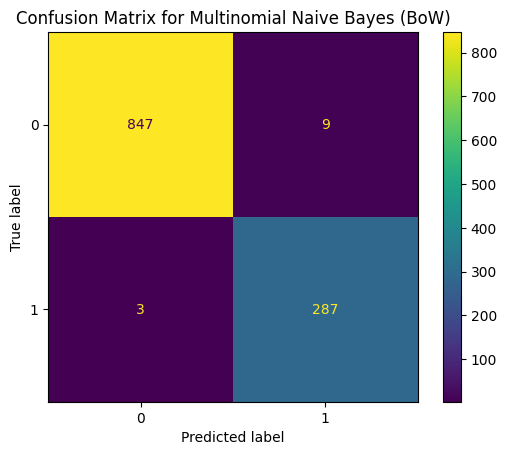

In [10]:
y = df_emails['spam']
X = X_bow

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

mnb_bow_classifier = MultinomialNB()

mnb_bow_classifier.fit(X_train, y_train)

y_pred_mnb_bow = mnb_bow_classifier.predict(X_test)

accuracy_mnb_bow = accuracy_score(y_test, y_pred_mnb_bow)
precision_mnb_bow = precision_score(y_test, y_pred_mnb_bow)
recall_mnb_bow = recall_score(y_test, y_pred_mnb_bow)
f1_mnb_bow = f1_score(y_test, y_pred_mnb_bow)

print(f"\nMultinomial Naive Bayes (BoW) Performance:")
print(f"Accuracy: {accuracy_mnb_bow:.4f}")
print(f"Precision: {precision_mnb_bow:.4f}")
print(f"Recall: {recall_mnb_bow:.4f}")
print(f"F1-Score: {f1_mnb_bow:.4f}")

cm_mnb_bow = confusion_matrix(y_test, y_pred_mnb_bow)
disp_mnb_bow = ConfusionMatrixDisplay(confusion_matrix=cm_mnb_bow,
                                       display_labels=mnb_bow_classifier.classes_)
disp_mnb_bow.plot()
plt.title('Confusion Matrix for Multinomial Naive Bayes (BoW)')
plt.show()

Shape of X_train: (4582, 29220)
Shape of X_test: (1146, 29220)
Shape of y_train: (4582,)
Shape of y_test: (1146,)

Multinomial Naive Bayes (TF-IDF) Performance:
Accuracy: 0.8778
Precision: 1.0000
Recall: 0.5172
F1-Score: 0.6818


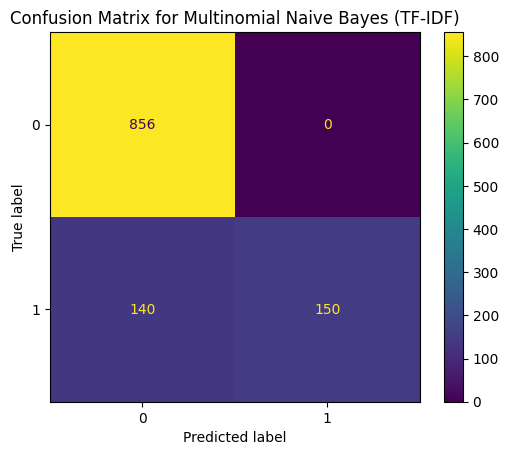

In [11]:
y = df_emails['spam']
X = X_tfidf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

mnb_tfidf_classifier = MultinomialNB()

mnb_tfidf_classifier.fit(X_train, y_train)

y_pred_mnb_tfidf = mnb_tfidf_classifier.predict(X_test)

accuracy_mnb_tfidf = accuracy_score(y_test, y_pred_mnb_tfidf)
precision_mnb_tfidf = precision_score(y_test, y_pred_mnb_tfidf)
recall_mnb_tfidf = recall_score(y_test, y_pred_mnb_tfidf)
f1_mnb_tfidf = f1_score(y_test, y_pred_mnb_tfidf)

print(f"\nMultinomial Naive Bayes (TF-IDF) Performance:")
print(f"Accuracy: {accuracy_mnb_tfidf:.4f}")
print(f"Precision: {precision_mnb_tfidf:.4f}")
print(f"Recall: {recall_mnb_tfidf:.4f}")
print(f"F1-Score: {f1_mnb_tfidf:.4f}")

cm_mnb_tfidf = confusion_matrix(y_test, y_pred_mnb_tfidf)
disp_mnb_tfidf = ConfusionMatrixDisplay(confusion_matrix=cm_mnb_tfidf,
                                        display_labels=mnb_tfidf_classifier.classes_)
disp_mnb_tfidf.plot()
plt.title('Confusion Matrix for Multinomial Naive Bayes (TF-IDF)')
plt.show()

Shape of X_train: (4582, 29220)
Shape of X_test: (1146, 29220)
Shape of y_train: (4582,)
Shape of y_test: (1146,)

Gaussian Naive Bayes (TF-IDF) Performance:
Accuracy: 0.9546
Precision: 0.9612
Recall: 0.8552
F1-Score: 0.9051


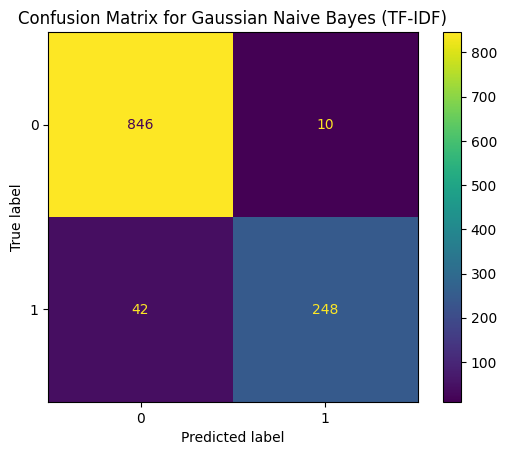

In [12]:
from sklearn.naive_bayes import GaussianNB

X = X_tfidf.toarray()
y = df_emails['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

gnb_tfidf_classifier = GaussianNB()

gnb_tfidf_classifier.fit(X_train, y_train)

y_pred_gnb_tfidf = gnb_tfidf_classifier.predict(X_test)

accuracy_gnb_tfidf = accuracy_score(y_test, y_pred_gnb_tfidf)
precision_gnb_tfidf = precision_score(y_test, y_pred_gnb_tfidf)
recall_gnb_tfidf = recall_score(y_test, y_pred_gnb_tfidf)
f1_gnb_tfidf = f1_score(y_test, y_pred_gnb_tfidf)

print(f"\nGaussian Naive Bayes (TF-IDF) Performance:")
print(f"Accuracy: {accuracy_gnb_tfidf:.4f}")
print(f"Precision: {precision_gnb_tfidf:.4f}")
print(f"Recall: {recall_gnb_tfidf:.4f}")
print(f"F1-Score: {f1_gnb_tfidf:.4f}")

cm_gnb_tfidf = confusion_matrix(y_test, y_pred_gnb_tfidf)
disp_gnb_tfidf = ConfusionMatrixDisplay(confusion_matrix=cm_gnb_tfidf,
                                        display_labels=gnb_tfidf_classifier.classes_)
disp_gnb_tfidf.plot()
plt.title('Confusion Matrix for Gaussian Naive Bayes (TF-IDF)')
plt.show()

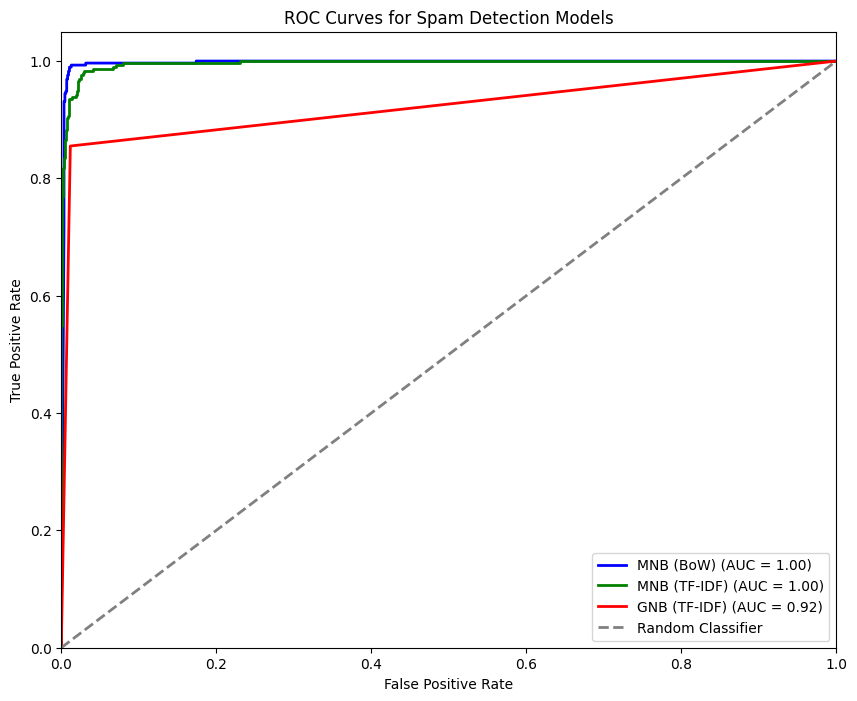

ROC curves generated and displayed for all models.


In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

y = df_emails['spam']


X_bow_train, X_bow_test, y_bow_train, y_bow_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

y_prob_mnb_bow = mnb_bow_classifier.predict_proba(X_bow_test)[:, 1]
fpr_mnb_bow, tpr_mnb_bow, _ = roc_curve(y_bow_test, y_prob_mnb_bow)
auc_mnb_bow = auc(fpr_mnb_bow, tpr_mnb_bow)


X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

y_prob_mnb_tfidf = mnb_tfidf_classifier.predict_proba(X_tfidf_test)[:, 1]
fpr_mnb_tfidf, tpr_mnb_tfidf, _ = roc_curve(y_tfidf_test, y_prob_mnb_tfidf)
auc_mnb_tfidf = auc(fpr_mnb_tfidf, tpr_mnb_tfidf)

X_gnb_tfidf_dense = X_tfidf.toarray()
X_gnb_tfidf_train, X_gnb_tfidf_test, y_gnb_tfidf_train, y_gnb_tfidf_test = train_test_split(X_gnb_tfidf_dense, y, test_size=0.2, random_state=42)

y_prob_gnb_tfidf = gnb_tfidf_classifier.predict_proba(X_gnb_tfidf_test)[:, 1]
fpr_gnb_tfidf, tpr_gnb_tfidf, _ = roc_curve(y_gnb_tfidf_test, y_prob_gnb_tfidf)
auc_gnb_tfidf = auc(fpr_gnb_tfidf, tpr_gnb_tfidf)

plt.figure(figsize=(10, 8))
plt.plot(fpr_mnb_bow, tpr_mnb_bow, color='blue', lw=2, label=f'MNB (BoW) (AUC = {auc_mnb_bow:.2f})')
plt.plot(fpr_mnb_tfidf, tpr_mnb_tfidf, color='green', lw=2, label=f'MNB (TF-IDF) (AUC = {auc_mnb_tfidf:.2f})')
plt.plot(fpr_gnb_tfidf, tpr_gnb_tfidf, color='red', lw=2, label=f'GNB (TF-IDF) (AUC = {auc_gnb_tfidf:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Spam Detection Models')
plt.legend(loc="lower right")
plt.show()

print("ROC curves generated and displayed for all models.")